In [1]:
import pylab
import numpy
import matplotlib
%matplotlib inline

In [2]:
matplotlib.rcParams.update({'font.size': 14})

In [3]:
fileBi=open("BackgroundsData/Gamma-Bi-100M.txt")
ContentBi=fileBi.readlines()
NBins,Min,Max=numpy.array(ContentBi[0][1:-3].split(","),dtype='int')
Bins=numpy.linspace(Min,Max,NBins+2)
ValsBi={}

for line in ContentBi[1:]:
    ValsBi[int(line.split(",")[0].split('(')[-1])]=float(line.split(",")[1][:-3])

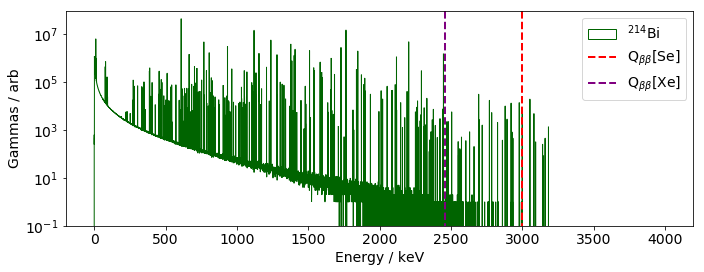

In [8]:
pylab.figure(figsize=(10,4))
thehistBi=pylab.hist([Bins[x] for x in ValsBi.keys()],weights=list(ValsBi.values()),bins=Bins,histtype='step',color='DarkGreen',label="$^{214}$Bi")
pylab.plot([2995,2995],[0,1e8],'--',color='red',linewidth=2,label=r"Q$_{\beta\beta}$[Se]")
pylab.plot([2462,2462],[0,1e8],'--',color='purple',linewidth=2,label=r"Q$_{\beta\beta}$[Xe]")
pylab.ylabel("Gammas / arb")
pylab.semilogy()
pylab.xlabel("Energy / keV")
pylab.ylim(1e-1,1e8)
pylab.legend(loc='upper right',fontsize=14,fancybox=True)
ax=pylab.gca()
handles, labels = ax.get_legend_handles_labels()
handles=[handles[2],handles[0],handles[1]]
labels=[labels[2],labels[0],labels[1]]
pylab.legend(handles, labels,fontsize=14,fancybox=True)

pylab.yscale("log",nonposx='clip')

pylab.tight_layout()
pylab.savefig("BiEvents.png",dpi=200,bbox_inches=0)

In [9]:
fileTl=open("BackgroundsData/Gamma-Tl-100M.txt")
ContentTl=fileTl.readlines()
NBins,Min,Max=numpy.array(ContentTl[0][1:-3].split(","),dtype='int')
Bins=numpy.linspace(Min,Max,NBins+2)
ValsTl={}

for line in ContentTl[1:]:
    ValsTl[int(line.split(",")[0].split('(')[-1])]=float(line.split(",")[1][:-3])

In [10]:
pylab.figure(figsize=(10,4))
thehistBi=pylab.hist([Bins[x] for x in ValsBi.keys()],weights=list(ValsBi.values()),bins=Bins,histtype='step',color='DarkGreen',label="$^{214}$Bi")

pylab.semilogy()
pylab.plot([2995,2995],[0,1e8],'--',color='red',linewidth=2,label=r"Q$_{\beta\beta}$[Se]")
pylab.plot([2462,2462],[0,1e8],'--',color='purple',linewidth=2,label=r"Q$_{\beta\beta}$[Xe]")

pylab.legend(loc='upper right',fancybox=True)
pylab.xlabel("Energy / keV")
pylab.ylim(1e-1,1e8)
pylab.ylabel("Gammas / arb")
ax=pylab.gca()
handles, labels = ax.get_legend_handles_labels()
handles=[handles[2],handles[0],handles[1]]
labels=[labels[2],labels[0],labels[1]]
pylab.legend(handles, labels,fontsize=14,fancybox=True)

pylab.yscale("log",nonposx='clip')
pylab.tight_layout()
pylab.savefig("TlEvents.png",dpi=200,bbox_inches=0)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
pylab.figure(figsize=(5,4))
thehist=pylab.hist(Bins[ValsTl.keys()],weights=ValsTl.values(),bins=Bins,histtype='step',color='DarkBlue',label="$^{208}$Tl")
thehist=pylab.hist(Bins[ValsBi.keys()],weights=ValsBi.values(),bins=Bins,histtype='step',color='DarkGreen',label="$^{214}$Bi")

pylab.xlim(2995-50,2995+50)
pylab.fill_betweenx([0,1e8],[2995*0.993,2995*0.993],[2995*1.007,2995*1.007],color='red',alpha='0.1')
pylab.legend(loc='upper right',fontsize=14,fancybox=True)
pylab.semilogy()
pylab.plot([2995,2995],[0,1e8],'--',color='red',linewidth=2)



pylab.xlabel("Energy / keV")
pylab.ylim(1e-1,1e8)
pylab.yscale("log",nonposx='clip')
pylab.title(r"Q$_{\beta\beta}$[$^{82}$Se] $\pm$ 0.7%",fontsize=14)
pylab.ylabel("Gammas / arb")


pylab.tight_layout()
pylab.savefig("SeCloseup.png",dpi=200,bbox_inches=0)
pylab.show()

pylab.figure(figsize=(5,4))
thehist=pylab.hist(Bins[ValsTl.keys()],weights=ValsTl.values(),bins=Bins,histtype='step',color='DarkBlue',label="$^{208}$Tl")
thehist=pylab.hist(Bins[ValsBi.keys()],weights=ValsBi.values(),bins=Bins,histtype='step',color='DarkGreen',label="$^{214}$Bi")

pylab.xlim(2462-50,2462+50)
pylab.fill_betweenx([0,1e8],[2462*0.993,2463*0.993],[2462*1.007,2462*1.007],color='purple',alpha='0.1')
pylab.legend(loc='upper right',fontsize=14,fancybox=True)
pylab.semilogy()

pylab.plot([2462,2462],[0,1e8],'--',color='purple',linewidth=2)


pylab.ylabel("Gammas / arb")


pylab.xlabel("Energy / keV")
pylab.ylim(1e-1,1e8)
pylab.yscale("log",nonposx='clip')
pylab.title(r"Q$_{\beta\beta}$[$^{136}$Xe] $\pm$ 0.7%",fontsize=14)
pylab.tight_layout()
pylab.savefig("XeCloseup.png",dpi=200,bbox_inches=0)



In [ ]:
BiXes=[]
BiSes=[]
TlXes=[]
TlSes=[]



QXe=2462
QSe=2995
widths=numpy.logspace(-4,0,100)
for w in widths:
    BiXes.append(sum((numpy.exp(-((thehistBi[1][1:]/QXe-1.)/(2.*w))**2)*thehistBi[0])))
    BiSes.append(sum((numpy.exp(-((thehistBi[1][1:]/QSe-1.)/(2.*w))**2)*thehistBi[0])))
    
BiXes=numpy.array(BiXes)
BiSes=numpy.array(BiSes)


In [ ]:
pylab.figure(figsize=(6,5))
pylab.loglog(widths*1e2,BiSes/BiXes,linewidth=2)
pylab.xlim(1e-1,100)
pylab.xlabel("Gaussian Energy Resolution / % FWHM",fontsize=15)
pylab.ylabel("Background Ratio\n $^{214}$Bi [Se] / $^{214}$Bi [Xe]",fontsize=15)
pylab.ylim(1e-2,1)
pylab.fill_betweenx([1e-2,1],[1e-1,1e-1],[0.36,0.36],color='DimGrey',alpha=0.2,zorder=0)
pylab.text(0.4,0.5,'Intrinsic SeF$_6$',rotation=90,color='DarkRed',fontsize=14)
pylab.text(0.2,0.5,'Intrinsic Xe',rotation=90,color='red',fontsize=14)


pylab.plot([0.28,0.28],[1e-2,1],'--',color='red',linewidth=2)
pylab.plot([0.36,0.36],[1e-2,1],'--',color='DarkRed',linewidth=2)
pylab.grid(axis='y',which='both')
pylab.grid(axis='x',which='both')
pylab.tight_layout()
pylab.savefig("BGratio.png",dpi=200,bbox_inches=0)


In [ ]:
pylab.figure(figsize=(6,5))
pylab.loglog(widths*1e2,BiSes*7/BiXes[42],linewidth=2)
pylab.xlim(1e-1,100)
pylab.xlabel("Gaussian Energy Resolution / % FWHM",fontsize=15)
pylab.ylabel("Background Index \n ct / [ton yr FWHM]",fontsize=15)
pylab.ylim(1e-2,10)
pylab.fill_betweenx([1e-2,10],[1e-1,1e-1],[0.36,0.36],color='DimGrey',alpha=0.2,zorder=0)
pylab.text(0.4,5,'Intrinsic SeF$_6$',rotation=90,color='DarkRed',fontsize=14)


pylab.xlim(1e-1,10)
pylab.plot([0.36,0.36],[1e-2,10],'--',color='DarkRed',linewidth=2)
pylab.grid(axis='y',which='both')
pylab.grid(axis='x',which='both')
pylab.tight_layout()
pylab.savefig("BGIndex.png",dpi=200,bbox_inches=0)



In [ ]:
pylab.figure(figsize=(6,8))
pylab.xlim(1e-1,100)
pylab.xlabel("Gaussian Energy Resolution / % FWHM",fontsize=15)
pylab.ylabel("Background Index \n ct / [ton yr FWHM]",fontsize=15)
pylab.ylim(1e-2,1000)
#pylab.fill_betweenx([1e-2,10],[1e-1,1e-1],[0.36,0.36],color='DimGrey',alpha=0.2,zorder=0)
#pylab.text(0.4,5,'Intrinsic SeF$_6$',rotation=90,color='DarkRed',fontsize=14)

pylab.plot([2.7],[130],'s',color='DarkRed',label="EXO-200 / LXe",markersize=10)
pylab.plot([0.7],[7],'o',color='red',label="NEXT-100 / HPGXe",markersize=10)
pylab.loglog(widths*1e2,BiSes*7/BiXes[42],linewidth=2,label="SeF6-100")


pylab.xlim(1e-1,10)
pylab.plot([0.1,10],[0.1,0.1],'--',color='purple',linewidth=2)
pylab.text(3,0.12,"NSAC Goal",color='purple')
pylab.text(0.12,0.12,"1x",color='purple')
pylab.text(0.12,1.2,"10x",color='purple')
pylab.text(0.12,12,"100x",color='purple')
pylab.text(0.12,120,"1000x",color='purple')
pylab.grid(axis='y',which='both')
pylab.grid(axis='x',which='both')
pylab.tight_layout()
pylab.legend(loc='upper left',fontsize=14)
pylab.savefig("TPCComparison.png",dpi=200,bbox_inches=0)




In [ ]:
1e9**2/0.1